In [1]:
import numpy as np
from scipy import *
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from xppcall import xpprun
import networkx as nx
import conley_functions as cf
import subprocess
import nolds
import scipy.optimize

####Set up network weights
a = 16
b = 12
d = 4
e = -2
W = np.array([[a, 0, -b, 0], [0, a, 0, -b],
              [a, 0, -d, 0], [0, a, 0, -d]]) 
N = W.shape[0]
ps = [-1,-1,-4,-4]

In [2]:
#make file to simulate Wilson-Cowan network with XPP
ksdm=0
time=500
dt=0.05
P = 1
expn = 21
gamma = 10
Weights = []
datass = []
initss = []

for expi in  np.linspace(-10, 10, num=expn):
    Wp = np.zeros((N,N))
    Wp[0,-1] = ksdm
    Wp[1,-2] = ksdm
    Wp[2,-3] = ksdm
    Wp[3,-4] = ksdm
    Wp[0,1] = expi
    Wp[1,0] = expi
    Wp[2,3] = expi
    Wp[3,2] = expi
    Ws = W + Wp
    
    Weights.append(Ws)
#     wcstring = cf.make_wc(Ws, ps, dt=dt, inits=np.random.rand(N))
#     with open('wc_p.ode', 'w') as f:
#         f.writelines(wcstring)

#     datas = np.zeros((P, int(.1/dt)*time*10+1, N))
#     data_length_list = []
#     for j in range(P):
#         inits = np.random.rand(N)
#         initss.append(inits)
#         inits_dict={}
#         for i,init in enumerate(inits[:]):
#             inits_dict['x'+str(i+1)]=init
#         npa, vn = xpprun('wc_p.ode',inits=inits_dict, parameters={'total':time}, clean_after=True)
#         datas[j, :, :] = npa[:,1:].copy()
#         data_length_list.append(npa[:,1:].shape[0])
#     datass.append(datas)

In [3]:
# %matplotlib notebook
# colors = ['b', 'g', 'r', 'c', 'm', 'y']# c=colors[k+j%6],
# time=500
# shift=int((int(.1/dt)*time*10+1)*.5)
# til=int((int(.1/dt)*time*10+1)*.05)
# fig = plt.figure(figsize=(5,5))
# ax = fig.add_subplot(111, projection='3d')
# for j in range(0,expn):
#     for k in range(P):
# #         ax.plot(datass[j][k,shift:til,0], datass[j][k,shift:til,1], datass[j][k,shift:til,2], '.', label=r"$\lambda$="+str(j))#str(j)+':'+str(k))
#         ax.plot(datass[j][k,shift:,0], datass[j][k,shift:,1], datass[j][k,shift:,2], '.', label=r"$\lambda$="+str(j))#str(j)+':'+str(k))
#         plt.legend()
# plt.show()

In [4]:
# %matplotlib notebook
# plt.figure(figsize=(9,3))
# j=18
# # for j in range(31,32, 10):
# #     plt.plot(range(datass[j][0,shift:,0].shape[0]), datass[j][0,shift:,0])
# shift=int(20*time*0.5)
# plt.plot(range(datass[j][0,shift:,0].shape[0]), datass[j][0,shift:,0])
# plt.plot(range(datass[j][0,shift:,0].shape[0]), datass[j][0,shift:,1])
# # for i in range(10):
# #     plt.plot(range(datass[j][0,shift:,0].shape[0]), datass[j][0,shift:,i])
# plt.plot(range(datass[j][0,shift:,0].shape[0]), datass[j][0,shift:,2])
# plt.plot(range(datass[j][0,shift:,0].shape[0]), datass[j][0,shift:,3])

In [10]:
expi = 0
ksdm = 0
Wp = np.zeros((N,N))
Wp[0,-1] = ksdm
Wp[1,-2] = ksdm
Wp[2,-3] = ksdm
Wp[3,-4] = ksdm
Wp[0,1] = expi
Wp[1,0] = expi
Wp[2,3] = expi
Wp[3,2] = expi
Ws = W + Wp

# Ws=Weights[ini]
time=2000
dt=0.1
wcstring = cf.make_wc(Ws, ps, dt=dt)
with open('wc_p.ode', 'w') as f:
    f.writelines(wcstring)
# grid=cf.make_grid(4, 0.25, 0.75, 0.25)
grid=[[0,0,0,0]]
# grid=cf.make_grid(4, 0.2, 0.8, 0.2)
# grid=cf.make_grid(4, 0.2, 0.8, 0.1)
# grid=cf.make_grid(4, 0.0, 0.1, 0.25)

# grid=cf.make_grid(4, 0., 1, 1.)
P = len(grid)
print("P:",P,Ws)
datas = np.zeros((P, int(.1/dt)*time*10+1, N))
data_length_list = []
for j,gc in enumerate(grid):
    with open('wc_p.ode', 'w') as f:
        f.writelines(wcstring)
    inits_dict={}
    for i,init in enumerate(gc[:]):
        inits_dict['x'+str(i+1)]=init
    npa, vn = xpprun('wc_p.ode',inits=inits_dict, parameters={'total':time}, clean_after=True)
    datas[j, :, :] = npa[:,1:].copy()
    data_length_list.append(npa[:,1:].shape[0])

P: 1 [[ 16.   0. -12.   0.]
 [  0.  16.   0. -12.]
 [ 16.   0.  -4.   0.]
 [  0.  16.   0.  -4.]]


<IPython.core.display.Javascript object>


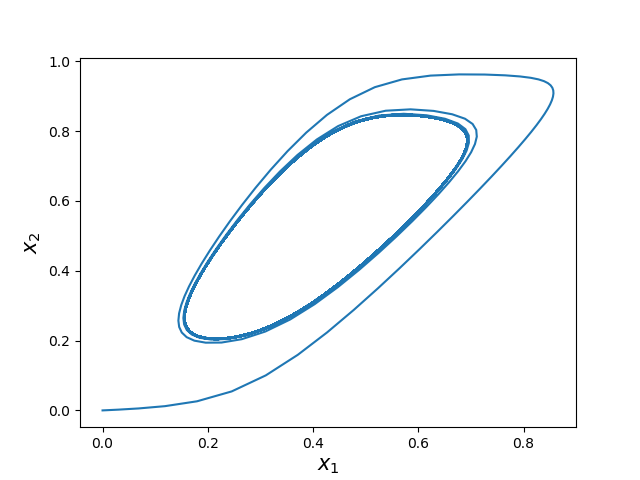

In [21]:
%matplotlib notebook

plt.plot(npa[:,1],npa[:,3])
plt.xlabel(r'$x_1$',fontsize=15)
plt.ylabel(r'$x_2$',fontsize=15)
plt.savefig("Images/eipair.png")

In [11]:
shift=int((int(.1/dt)*time*10+1)*.1)
nolds.lyap_e(npa[shift:,1])

array([ 0.05932482, -0.03667916, -0.09744659, -0.20456891], dtype=float32)

<IPython.core.display.Javascript object>


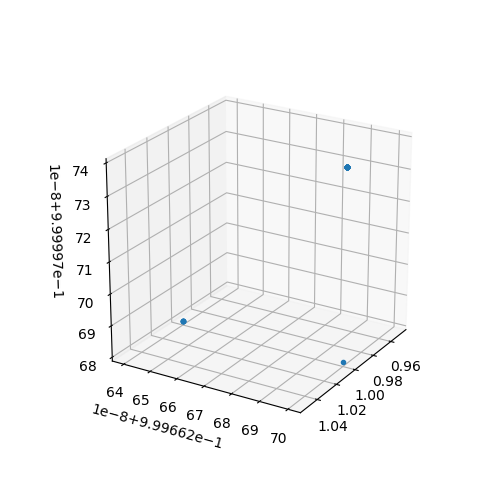

In [43]:
%matplotlib notebook
time=20
colors = ['b', 'g', 'r', 'c', 'm', 'y']# c=colors[k+j%6],
shift=int((int(.1/dt)*time*10+1)*.85)
til=int((int(.1/dt)*time*10+1)*1.)
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
# for k in range(P):
# i=3
# for k in range(10*i,10*(i+1)):
for k in range(4,5):
#     print(k,grid[k])
    ax.plot(datas[k,shift:til,0], datas[k,shift:til,1], datas[k,shift:til,2], '.', label=r"$\lambda$="+str(k))#str(j)+':'+str(k))
#     ax.plot(datas[k,shift:,0], datas[k,shift:,1], datas[k,shift:,2], '.', label=r"$\lambda$="+str(k))#str(j)+':'+str(k))
#     plt.legend()
# ax.scatter([x[0]], [x[1]], [x[2]],marker='s',s=1,c='red')
# ax.set_xlabel('$x_1$', fontsize=15)
# ax.set_ylabel('$x_2$', fontsize=15)
# ax.set_zlabel('$x_3$', fontsize=15)
# ax.set_xticks(ticks=[0.,.5,1.])
# ax.set_yticks(ticks=[0.,.5,1.])
# ax.set_zticks(ticks=[0.,.5,1.])
plt.show()

In [27]:
npa[-1,1:]

datas[800:1000,-1,:]



for k in range(P):
    if datas[k,-1,0] not in [0.9996627,0.99709779,0.15643267,0.99709886,0.99709761,0.15648176]:
        print(datas[k,-1,:])

[0.99709833 0.15641841 0.99990505 0.68205523]
[0.99709791 0.15647551 0.99990505 0.68209189]
[0.99709767 0.15650755 0.99990505 0.68211174]
[0.99709797 0.15646538 0.99990505 0.68208611]
[0.99709809 0.15645775 0.99990505 0.68208826]
[0.99709785 0.15650836 0.99990505 0.6821298 ]
[0.99709815 0.15647787 0.99990505 0.68212807]
[0.99709696 0.15656306 0.99990499 0.68209702]
[0.99709696 0.15655532 0.99990499 0.68209189]
[0.99709648 0.15648454 0.99990499 0.6819244 ]
[0.99709707 0.15649243 0.99990499 0.68201196]
[0.99709827 0.15639667 0.99990505 0.68201798]
[0.99709767 0.15644898 0.99990499 0.68202156]
[0.99709785 0.15643464 0.99990505 0.68202287]
[0.99709755 0.15647115 0.99990499 0.6820417 ]
[0.99709707 0.15647034 0.99990499 0.68197918]
[0.99709755 0.15642489 0.99990499 0.68196821]
[0.15648456 0.99709833 0.68215424 0.99990505]
[0.15647303 0.99709845 0.68215454 0.99990505]
[0.15650304 0.99709851 0.68220305 0.99990505]
[0.15653878 0.99709779 0.68216872 0.99990505]
[0.15652661 0.99709797 0.68217474 

[0.99709815 0.15646975 0.99990505 0.68211097]
[0.99709785 0.15651171 0.99990505 0.68213874]
[0.99709743 0.15653908 0.99990505 0.68212563]
[0.99709827 0.15645368 0.99990505 0.68209934]
[0.99709797 0.15650122 0.99990505 0.68213809]
[0.99709755 0.15653583 0.99990505 0.6821366 ]
[0.99709839 0.1564382  0.99990505 0.68209845]
[0.99709809 0.15648958 0.99990505 0.68213511]
[0.99709767 0.156532   0.99990505 0.68214589]
[0.99709827 0.15654141 0.99990505 0.68223447]
[0.99709821 0.15647888 0.99990505 0.68213433]
[0.15640922 0.99709827 0.68203896 0.99990505]
[0.99709833 0.15648934 0.99990505 0.68216574]
[0.99709755 0.15655552 0.99990505 0.68216521]
[0.15646912 0.99709779 0.68206608 0.99990505]
[0.15645686 0.99709785 0.68205649 0.99990505]
[0.15644026 0.99709797 0.68204576 0.99990505]
[0.15642001 0.99709827 0.68204921 0.99990505]
[0.15644786 0.99709862 0.68214202 0.99990505]
[0.15641207 0.99709815 0.68202937 0.99990505]
[0.15649514 0.99709761 0.68208307 0.99990505]
[0.1564903  0.99709767 0.68208426 

[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 

[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 

[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 

[0.99966276 0.9996627  0.99999774 0.99999774]
[0.99966276 0.9996627  0.99999774 0.99999774]
[0.99966276 0.9996627  0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.9996627  0.99999774 0.99999774]
[0.99966276 0.9996627  0.99999774 0.99999774]
[0.99709797 0.15638702 0.99990499 0.68196547]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.9996627  0.99999774 0.99999774]
[0.99709821 0.15637793 0.99990505 0.68197948]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 0.99999774]
[0.99966276 0.99966276 0.99999774 

<IPython.core.display.Javascript object>


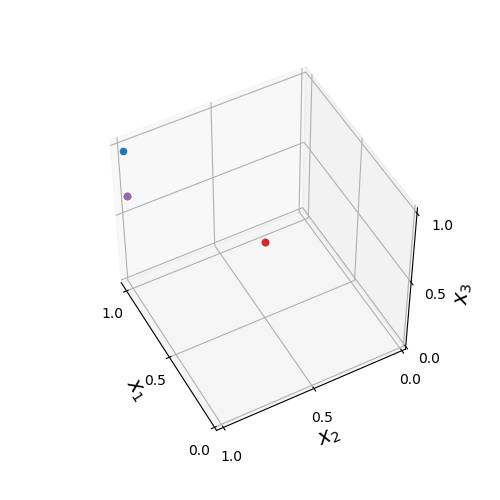

In [41]:
%matplotlib notebook
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
for x in xlist:
    ax.scatter(x[0], x[2], x[3], '.', label=r"$\lambda$="+str(k))#str(j)+':'+str(k))
ax.set_xlabel('$x_1$', fontsize=15)
ax.set_ylabel('$x_2$', fontsize=15)
ax.set_zlabel('$x_3$', fontsize=15)
ax.set_xticks(ticks=[0.,.5,1.])
ax.set_yticks(ticks=[0.,.5,1.])
ax.set_zticks(ticks=[0.,.5,1.])
plt.show()

In [46]:
# x=scipy.optimize.broyden2(F, [.5]*4, f_tol=1e-15)
# cf.eval_wcode(x, Weights[0], ps), x, np.linalg.eig(cf.jac(x,Weights[0],ps))[0]
xlist=[[0.99966273, 0.99966273, 0.99999772, 0.99999772],
[0.99709779, 0.15645896, 0.99990505, 0.6820507 ],
[0.15643267, 0.99709791, 0.6820249 , 0.99990505]]
# [0.15640503, 0.99709827, 0.6820308 , 0.99990505],
# [0.99709886, 0.1564033 , 0.99990505, 0.68210477],
# [0.99709761, 0.15643245, 0.99990499, 0.6819917 ],
# [0.15648176, 0.9970963,  0.68189812, 0.99990499]]
for x in xlist:
#     print("x", x)
#     print(F(np.array(x)))
    print("J eigenvals", np.linalg.eig(cf.jac(x,Ws,ps))[0])

J eigenvals [-0.41546307 -0.71101212 -1.58516093 -1.29035686]
J eigenvals [ 2.28256355 -0.21138369 -1.52295758 -1.00856923]
J eigenvals [ 2.28319993 -0.21129339 -1.52299859 -1.0085662 ]


<IPython.core.display.Javascript object>


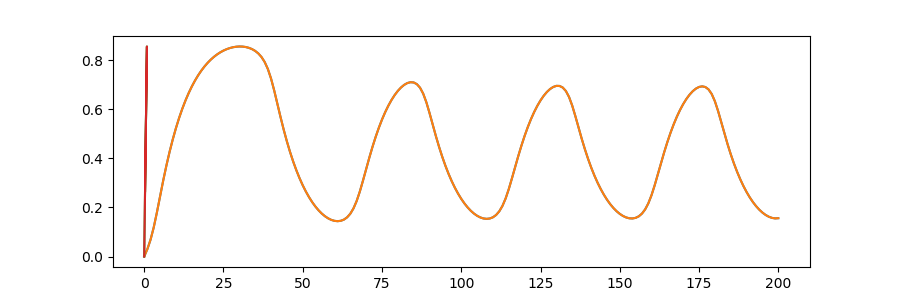

In [7]:
%matplotlib notebook
plt.figure(figsize=(9,3))
j=0
# for j in range(31,32, 10):
#     plt.plot(range(datass[j][0,shift:,0].shape[0]), datass[j][0,shift:,0])
shift=int(20*time*0.)
plt.plot(range(datas[j,shift:,0].shape[0]), datas[j,shift:,0])
plt.plot(range(datas[j,shift:,0].shape[0]), datas[j,shift:,1])
# plt.plot(range(datas[j,shift:,0].shape[0]), datas[j,shift:,2])
# plt.plot(range(datas[j,shift:,0].shape[0]), datas[j,shift:,3])
# j=76
# plt.plot(range(datas[j,shift:,0].shape[0]), datas[j,shift:,0])
# plt.plot(range(datas[j,shift:,0].shape[0]), datas[j,shift:,1])
# plt.plot(range(datas[j,shift:,0].shape[0]), datas[j,shift:,2])
# plt.plot(range(datas[j,shift:,0].shape[0]), datas[j,shift:,3])
# for j in range(P):
#     plt.plot(range(datas[j,shift:,0].shape[0]), datas[j,shift:,0]+datas[j,shift:,2])

In [401]:
# ex=10
# Ws[0,1] = ex
# Ws[1,0] = ex
# Ws[2,3] = ex
# Ws[3,2] = ex
# Ws

In [28]:
# Ws=Weights[12]
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def F(x):
    return -x+sigmoid(Ws.dot(x)+np.array(ps))
x=scipy.optimize.broyden2(F, [.01]*4, f_tol=1e-15)
# cf.eval_wcode(x, Weights[0], ps), x, np.linalg.eig(cf.jac(x,Weights[0],ps))[0]
print("x", x)
print("J eigenvals", np.linalg.eig(cf.jac(x,Ws,ps))[0])

x [0.99966273 0.99966273 0.99999772 0.99999772]
J eigenvals [-0.41546307 -0.71101213 -1.58516093 -1.29035686]


In [130]:
#Poincare Section
eps=0.05
shift = 5000
alldata = []
data_length_list = []
y = x[-1]
for p in range(P):
    data = datas[p,shift:,:]

    poincaresection = []
    for i,point in enumerate(data[1:]):
        if np.sign(data[i][-1]-y) == -np.sign(data[i-1][-1]-y) and np.abs(data[i][-1]-data[i-1][-1])<eps:
            poincaresection.append((data[i][1:]+data[i-1][1:])/2.)
    alldata.append(np.array(poincaresection).T)
    data_length_list.append(len(poincaresection))

In [51]:
# %matplotlib notebook
# alldataT = []
# colors = ['b', 'g', 'r', 'c', 'm', 'y']# c=colors[k+j%6],
# fig = plt.figure(figsize=(5,5))
# ax = fig.add_subplot(111, projection='3d')
# for p in range(P):
#     poincaresection = alldata[p]
#     poincaresection = np.array(poincaresection)
#     alldataT.append(poincaresection.T)
#     try:
#         ax.plot(poincaresection[0], poincaresection[1], poincaresection[2], 'b.')
#     except:
#         0
# ax.set_xlabel('$x_1$', fontsize=15)
# ax.set_ylabel('$x_2$', fontsize=15)
# ax.set_zlabel('$x_3$', fontsize=15)
# ax.set_xticks([0,1/2,1])
# ax.set_yticks([0,1/2,1])
# ax.set_zticks([0,1/2,1])
# ax.set_xticklabels([0.,.5,1.])
# ax.set_yticklabels([0.,.5,1.])
# ax.set_zticklabels([0.,.5,1.])
# ax.view_init(elev=30, azim=-130)
# plt.savefig("Images/poincareperorbwc.png")
# plt.show()

In [60]:
time=1000
Ws = Ws
wcstring = cf.make_wc(Ws, ps, dt=dt)
with open('wc_p.ode', 'w') as f:
    f.writelines(wcstring)
data_length_list = []
x=xlist[2]
sinits = [x,x+np.array([.0000001,.000000,.000000,0.00000]),
         x+np.array([.000000,.0000001,.000000,0.00000]),
         x+np.array([.000000,.000000,.0000001,0.00000]),
         x+np.array([.000000,.000000,.000000,0.000001]),
         x+np.array([.0000001,.0000001,.000000,0.00000]),
         x+np.array([.0000001,.000000,.0000001,0.00000]),
         x+np.array([.0000001,.000000,.000000,0.000001]),
         x+np.array([.000000,.0000001,.0000001,0.00000]),
         x+np.array([.000000,.000000,.0000001,0.000001]),
         x+np.array([.0000001,.0000001,.0000001,0.00000]),
         x+np.array([.0000001,.0000001,.000000,0.000001]),
         x+np.array([.0000001,.000000,.0000001,0.000001]),
         x+np.array([.0000001,.0000001,.0000001,0.000001])]
datas2 = np.zeros((len(sinits), int(.1/dt)*time*10+1, N))
for j,inits in enumerate(sinits):
    inits_dict={}
    for i,init in enumerate(inits[:]):
        inits_dict['x'+str(i+1)]=init
    npa, vn = xpprun('wc_p.ode',inits=inits_dict, parameters={'total':time}, clean_after=True)
    datas2[j, :, :] = npa[:,1:].copy()

<IPython.core.display.Javascript object>


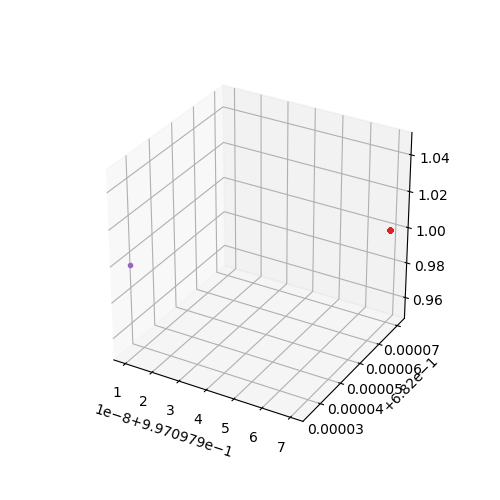

In [63]:
%matplotlib notebook
time=1000
shift=int((int(.1/dt)*time*10+1)*0.1)
til=int((int(.1/dt)*time*10+1)*.99)
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
for k in range(0,len(sinits)):
# for k in range(4,5):
#     ax.plot(datas2[k,shift:,0], datas2[k,shift:,1], datas2[k,shift:,2], '.', label=r"$\lambda$="+str(j))
    ax.plot(datas2[k,shift:til,1], datas2[k,shift:til,2], datas2[k,shift:til,3], '.', label=r"$\lambda$="+str(j))
ax.plot([x[1]],[x[2]],[x[3]],'.')
plt.show()

In [62]:
datas[:,100:,:].shape,x

((2401, 101, 4), [0.15643267, 0.99709791, 0.6820249, 0.99990505])

In [9]:
#Make combinatorial dynamical system from the data
# shift=int((int(.1/dt)*time*10+1)*.05)
hdatas = np.array(datas[:,100:,:]).reshape(-1,N)#npa[:shift,1:]
# hdatas = poincaresection.T
data_length_list = [datas[:,100:,:].shape[1]]*P
# hdatas = np.array(datass[7]).reshape(-1,N)
# hdatas = np.array(npa[:,1:]).reshape(-1,N)
# data_length_list = [npa[:,1:].shape[0]]
nbins = 2**6
delta = 1/nbins
print(delta)
cds = cf.Combinatorial_Dynamical_System(delta)
cds.get_cubesandgraph(hdatas[:,:], nbins, data_length_list, calc_matrix=True)

0.015625


In [10]:
#Get the recurrent components (Morse sets)
RCs = cds.get_recurrent_components(includeselfedges=False)
len(RCs)

2

<IPython.core.display.Javascript object>


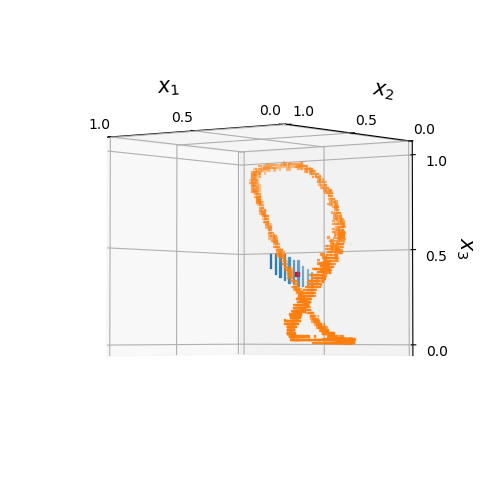

In [11]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
for i in range(0,len(RCs)):
    ax.scatter((np.array(RCs[i])[:,0]-delta),(np.array(RCs[i])[:,1]-delta), (np.array(RCs[i])[:,2]-delta),s=1, marker='s', label=i+1)

ax.scatter([x[0]*nbins], [x[1]*nbins], [x[2]*nbins],marker='s',s=10,c='red')
# (259, 259, 128, 128)
ax.set_xlabel('$x_1$', fontsize=15)
ax.set_ylabel('$x_2$', fontsize=15)
ax.set_zlabel('$x_3$', fontsize=15)
ax.set_xticks([0,nbins/2,nbins])
ax.set_yticks([0,nbins/2,nbins])
ax.set_zticks([0,nbins/2,nbins])
ax.set_xticklabels([0.,.5,1.])
ax.set_yticklabels([0.,.5,1.])
ax.set_zticklabels([0.,.5,1.])
ax.view_init(elev=50, azim=-125)
plt.savefig("Images/type_(%s,%s)"%(ksdm,expi))
plt.show()

In [503]:
bsrc=np.array(RCs[1])
# acirclerc

In [504]:
asrc.shape, bsrc.shape, csrc.shape

((1804, 4), (1301, 4), (9956, 4))

<IPython.core.display.Javascript object>


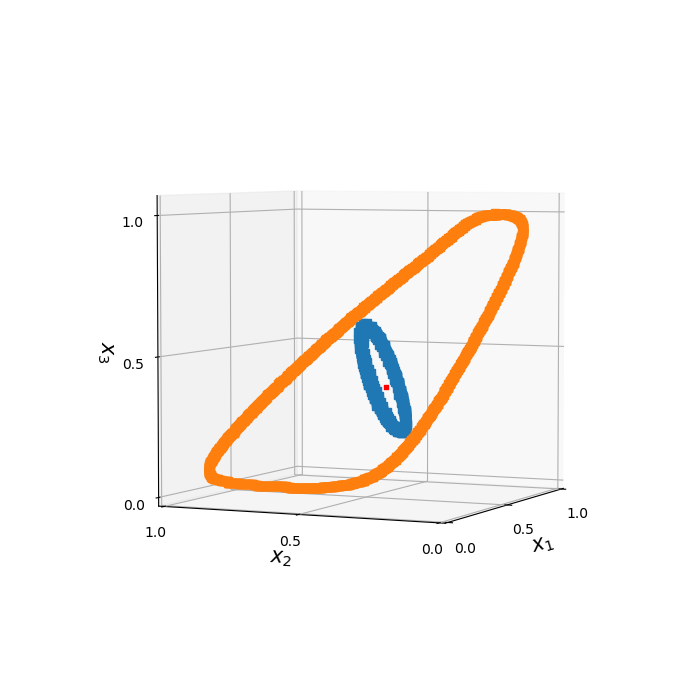

In [510]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
i=3
# bcirclerc = asrc[np.where(asrc[:,2]<2**7)]
plt.plot(bsrc[:,0]-delta, bsrc[:,1]-delta, bsrc[:,2]-delta, 's')

plt.plot(asrc[:,0]-delta, asrc[:,1]-delta, asrc[:,2]-delta, 's')

# plt.plot(csrc[:,0]-delta, csrc[:,1]-delta, csrc[:,2]-delta, 's', c='orange')

# bcirclerc = bsrc[np.where(-.7*bsrc[:,0]+1*bsrc[:,2]>0)]
# plt.plot(bcirclerc[:,0]-delta, bcirclerc[:,1]-delta, bcirclerc[:,2]-delta, 's', c='green')
# plt.plot(bsrc[:,0]-delta, bsrc[:,1]-delta, bsrc[:,2]-delta, 's', c='green')


# plt.plot((np.array(sRCs[i])[:,0]-delta),(np.array(sRCs[i])[:,1]-delta), (np.array(sRCs[i])[:,2]-delta), 's', label=i+1)

# for i in range(len(RCs)):
#     plt.plot((np.array(RCs[i])[:,0]-delta),(np.array(RCs[i])[:,1]-delta), (np.array(RCs[i])[:,2]-delta), 's', label=i+1)

# plt.plot((np.array(sRCs[i])[:,0]-delta),(np.array(sRCs[i])[:,1]-delta), (np.array(sRCs[i])[:,2]-delta), 's', label=i+1)
# acirclerc = asrc[np.where(asrc[:,2]>1.*2**7)]
# plt.plot(acirclerc[:,0]-delta, acirclerc[:,1]-delta, acirclerc[:,2]-delta, 's', c='blue')
# plt.plot([x[0]*2**8], [x[1]*2**8], [x[2]*2**8], 's')
ax.scatter([x[0]*2**8], [x[1]*2**8], [x[2]*2**8],marker='s',s=10,c='red')
ax.set_xlabel('$x_1$', fontsize=15)
ax.set_ylabel('$x_2$', fontsize=15)
ax.set_zlabel('$x_3$', fontsize=15)
ax.set_xticks([0,2**7,2**8])
ax.set_yticks([0,2**7,2**8])
ax.set_zticks([0,2**7,2**8])
ax.set_xticklabels([0.,.5,1.])
ax.set_yticklabels([0.,.5,1.])
ax.set_zticklabels([0.,.5,1.])
ax.view_init(elev=4., azim=-155)
plt.savefig("Images/type_(%s,%s)"%(ksdm,expi))
plt.show()

<IPython.core.display.Javascript object>


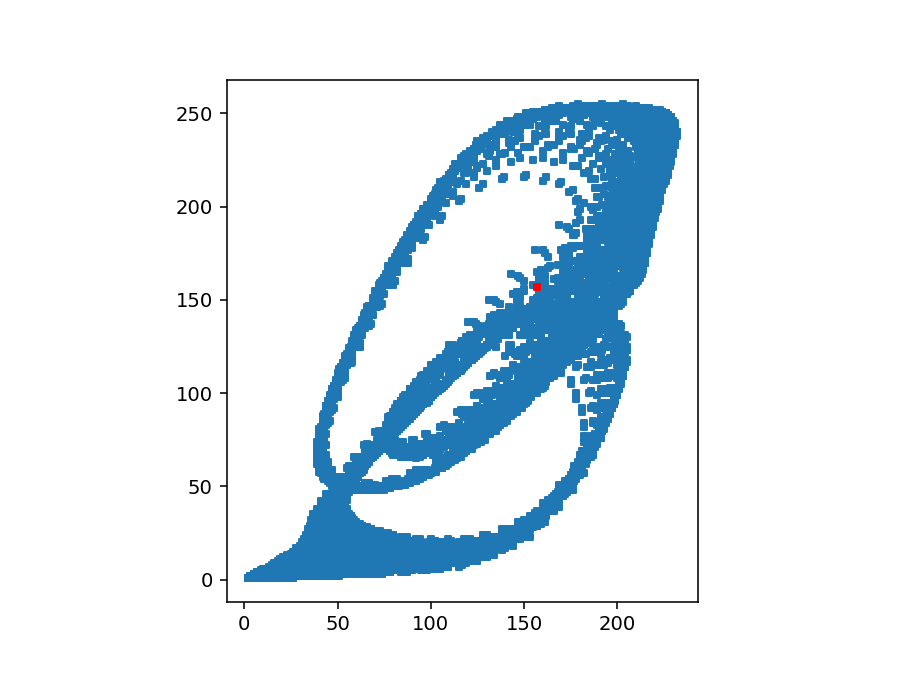

NameError: name 'ini' is not defined

In [59]:
fig, ax = plt.subplots(dpi=141)
i=0
plt.plot((np.array(sRCs[i])[:,0]-delta),(np.array(sRCs[i])[:,2]-delta), 's', label=i+1)

for i in range(len(RCs)):
    ax.set_aspect(1)
    fig.canvas.draw()
    s = max(1,((ax.get_window_extent().width * delta*72./fig.dpi) ** 2)+10)  
    plt.scatter((np.array(RCs[i])[:,0]-delta), (np.array(RCs[i])[:,2]-delta), s=s, marker='s', label=i+1)
# plt.legend()
ax.scatter([x[0]*2**8], [x[1]*2**8],marker='s',s=10,c='red')
plt.savefig("Images/2dplot_type_(%s,%s)"%(ksdm,-10+ini))
plt.show()

In [71]:
s

27.28896400000001

In [12]:
RCs = cds.get_recurrent_components(includeselfedges=False)

RPcubes = {}

for i in range(0,len(RCs)):#range(0,1)
    RPcubes[i] = []
    print("Component", i+1)
    RPcubes[i].append(RCs[i])
    
    #Get (isolated) neighbourhood (candidate) around recurrent set
    Nbhd = RPcubes[i][0]
    print("Finding isolated nbhd")
    S = cds.invariantPart(Nbhd)
    M = cds.cubical_wrap(S).intersection(cds.G.nodes())
    for mstep in range(1):
        M = cds.cubical_wrap(M).intersection(cds.G.nodes())
    
    #calculate index pair
    try:
        print("Calculating index pair")
        P1, P0, Pbar1, Pbar0 = cds.index_pair(M)
    
        #write index pairs to file for Conley index calcualtion with CHomP
        
        P1graph = nx.subgraph(cds.G, P1)
        cubefile, mapfile = cf.write_mapandcubes(P1graph, cds.delta, cds)
        with open('rc%s_P1_map.map'%(i+1), 'w') as f:
            f.writelines(mapfile)
        with open('rc%s_P1_cubes.cub'%(i+1), 'w') as f:
            f.writelines(cubefile)
            
        P0graph = nx.subgraph(cds.G, P0)
        cubefile, mapfile = cf.write_mapandcubes(P0graph, cds.delta, cds)
        with open('rc%s_P0_cubes.cub'%(i+1), 'w') as f:
            f.writelines(cubefile)
            
        print("Calculating homology")
        
#         proc = subprocess.Popen(['homcubes', '-i', 'rc%s_P1_map.map'%(i+1)],stdout=subprocess.PIPE)
#         proc = subprocess.Popen(['homcubes', '-i', 'rc%s_P1_cubes.cub'%(i+1), 'rc%s_P0_cubes.cub'%(i+1)],stdout=subprocess.PIPE)
        proc = subprocess.Popen(['homcubes', '-i',
                                 'rc%s_P1_map.map'%(i+1), 
                                 'rc%s_P1_cubes.cub'%(i+1),
                                 'rc%s_P0_cubes.cub'%(i+1)], stdout=subprocess.PIPE)

        linenum = 0
#         print(proc.stdout.readlines())
        while True:
            line = proc.stdout.readline()
            if not line:
                break
#             print("           "+line.rstrip().decode('UTF-8'))
#             if line.rstrip().decode('UTF-8')[0] in ['H', '	', 'D', 'F'] and not line.rstrip().decode('UTF-8')[1] == 'O':
#             if line.rstrip().decode('UTF-8')[0:2] == 'H_' or line.rstrip().decode('UTF-8')[0:2] == '  ' or line.rstrip().decode('UTF-8')[0:2] == 'Di':
                
            print("           "+line.rstrip().decode('UTF-8'))
            linenum+=1
            
    except Exception as e:
        if e=='too many values to unpack (expected 4)':
            print('Faile')
        else:
            print(e)

Component 1
Finding isolated nbhd
Calculating index pair
Calculating homology
           HOMCUBES, ver. 3.07, 09/25/15. Copyright (C) 1997-2015 by Pawel Pilarczyk.
           This is free software. No warranty. Consult 'license.txt' for details.
           Note: The empty file 'rc1_P0_cubes.cub' is assumed to contain cubes.
           Reading cubes to X from 'rc1_P1_cubes.cub'... 78 cubes read.
           Reading cubes to A from 'rc1_P0_cubes.cub'... 0 cubes read.
           200000 bit fields allocated (2 MB) to speed up 4-dimensional reduction.
           Reducing full-dim cubes from X... .         *         77 removed, 1 left.
           Note: The program assumes that the input map is acyclic.
           Reading the map on X from 'rc1_P1_map.map'... Done.
           Verifying if the image of X is contained in Y... Passed.
           Computing the image of the map... and of the inclusion... 4 cubes.
           Reducing full-dim cubes from Y... .         *         74 removed, 4 left.
 

In [154]:
i=0
proc = subprocess.Popen(['homcubes', '-i',
                                 'rc%s_P1_map.map'%(i+1), 
#                                  'rc%s_P1_cubes.cub'%(i+1),
#                                  'rc%s_P0_cubes.cub'%(i+1)
                        ],
                                    stdout=subprocess.PIPE)

linenum = 0
while True:
    line = proc.stdout.readline()
    if not line:
        break
    print("           "+line.rstrip().decode('UTF-8'))
    linenum+=1

           HOMCUBES, ver. 3.07, 09/25/15. Copyright (C) 1997-2015 by Pawel Pilarczyk.
           This is free software. No warranty. Consult 'license.txt' for details.
           Reading the domain of the map from 'rc1_P1_map.map'... 88053 cubes read.
           200000 bit fields allocated (2 MB) to speed up 4-dimensional reduction.


KeyboardInterrupt: 

In [155]:
i=0
proc = subprocess.Popen(['homcubes', 'rc%s_P1_cubes.cub'%(i+1), 
                                    'rc%s_P0_cubes.cub'%(i+1)],
                                    stdout=subprocess.PIPE)

linenum = 0
while True:
    line = proc.stdout.readline()
    if not line:
        break
    print("           "+line.rstrip().decode('UTF-8'))
    linenum+=1

           HOMCUBES, ver. 3.07, 09/25/15. Copyright (C) 1997-2015 by Pawel Pilarczyk.
           This is free software. No warranty. Consult 'license.txt' for details.
           Reading cubes to X from 'rc1_P1_cubes.cub'... 88053 cubes read.
           Reading cubes to A from 'rc1_P0_cubes.cub'... 530 cubes read.
           Computing X\A... 530 cubes removed from X, 87523 left.
           Restricting A to the neighbors of X\A... 0 cubes removed, 530 left.
           200000 bit fields allocated (2 MB) to speed up 4-dimensional reduction.
           Expanding A in X...        3       7      11      14      18      22      26      29      33      37      41      44      48      52      55      59      63      67      70      74      78      82      85      89      93      96     100     104     108     111     115     119     123     126     130     134     138     141     145     149     152     156     160     164     167     171     175     179     182     186     190     193     197 